In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import hàm để chia dữ liệu của sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [47]:
FILE_PATH = '/content/drive/MyDrive/AIO 2024/Module_3/Week 2/CN/dataset/Iris.csv'

# Đọc dữ liệu và hiển thị 5 dòng đầu tiên của dữ liệu

In [48]:
df = pd.read_csv(FILE_PATH)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Xem thống kê và các thông tin cơ bản của bộ dữ liệu

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Tiền xử lý dữ liệu

In [51]:
# Lấy cột Id làm cột chỉ số
df.set_index('Id',inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
# Lấy dữ liệu đầu vào và nhãn
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [53]:
# Mã hóa nhãn
le = LabelEncoder()
y = le.fit_transform(y)
print(f"Nhãn sau khi mã hóa:\n {y}")

Nhãn sau khi mã hóa:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [54]:
# Chia dữ liệu X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [55]:
print(f"X_train:\n{X_train[:5]}")
print('------------------')
print(f"y_train:{y_train[:5]}")

X_train:
[[5.1 3.5 1.4 0.3]
 [5.5 2.4 3.7 1. ]
 [6.3 2.9 5.6 1.8]
 [5.5 4.2 1.4 0.2]
 [5.8 2.7 5.1 1.9]]
------------------
y_train:[0 1 2 0 2]


In [68]:
class KNNClassification:
  # Hàm khởi tạo hyper pramameter
  def __init__(self, K,weight = 'uniform'):
    self.K = K
    # Khởi tạo trọng số của mô hình
    self.weight = weight

  # Hàm huấn luyện
  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train

  # Hàm dự đoán
  def predict(self,X_test):
    if X_test.ndim == 1:
      raise ValueError(f"{X_test} must be 2")
    self.X_test = X_test
    # Dự đoán của mô hình
    self.y_pred  = []

    #Matrix_distance = np.sqrt(((self.X_train - self.X_test[:,np.newaxis,:])**2).sum(axis = 2))
    for x in self.X_test:
      # Ma trận khoảng cách từ điểm x_test đến tất cả các điểm trong x_train
      Matrix_distance = np.sqrt(((x-self.X_train)**2).sum(axis = 1))

      # Lấy ra mảng chỉ số các phần tử được sắp xếp theo thứ tự tăng dần
      idx = Matrix_distance.argsort()

      # Lấy ra K nhãn có khoảng cách gần nhất so với x_test
      K_labels_nearest = self.y_train[idx[:self.K]]

      # Lấy ra Mảng khoảng cách của K láng giềng gần nhất so với x_test
      K_distance_nearest = Matrix_distance[idx[:self.K]]

      # Lấy ra thông số của K láng giềng gần dữ liệu train nhất
      self.K_nearest_neighbors = (K_distance_nearest,K_labels_nearest)

      # Mảng đếm tần suất xuất hiện của các nhãn
      frequency_labels = np.bincount(K_labels_nearest)

      # Lấy ra các nhãn có tần suất xuất hiện như nhau và xuất hiện nhiều nhất
      Labels_max_frequency = np.where(frequency_labels == frequency_labels.max())[0]

      # Nếu giá trị của tham số weight = 'uniform'' => Chọn ngẫu nhiên một trong các nhãn có tần suất xuất hiện nhiều nhất và xuất hiện nhiều như nhau
      if self.weight == 'uniform':
        self.y_pred.append(np.random.choice(Labels_max_frequency))
      if self.weight == 'distance':
        arr_weight = 1/K_distance_nearest
        '''
        if a value n is found at position i, out[n] += weight[i] instead of(thay vì) out[n] += 1.
        '''
        self.y_pred.append(np.bincount(K_labels_nearest,weights = arr_weight).argmax())
    return np.array(self.y_pred)

In [82]:
# Khởi tạo mô hình
clf = KNNClassification(K = 4,weight='distance')

In [83]:
# Huấn luyện mô hình
clf.fit(X_train,y_train)

In [84]:
# Dự đoán mô hình
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 1, 0, 2, 1, 1, 0, 0])

In [85]:
print(f"Độ chính xác của mô hình - accuracy: {accuracy_score(y_pred,y_test)}")

Độ chính xác của mô hình - accuracy: 0.9666666666666667


# How to select Hyper parameter K better

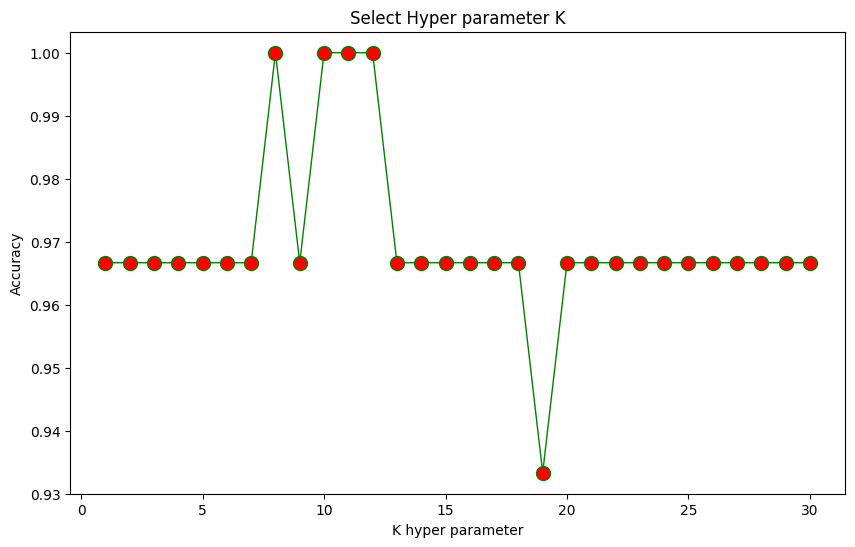

In [86]:
plt.figure(figsize=(10,6))
accuracy_arr = []
for i in range(1,31):
  # Khởi tạo mô hình
  clf = KNNClassification(K=i,weight='distance')
  # Huấn luyện mô hình
  clf.fit(X_train,y_train)
  # Dự đoán mô hình
  y_pred = clf.predict(X_test)

  accuracy_arr.append(accuracy_score(y_pred,y_test))
plt.title("Select Hyper parameter K")
plt.xlabel("K hyper parameter")
plt.ylabel("Accuracy")

plt.plot(
    range(1,31),
    accuracy_arr,
    marker  = 'o',
    markerfacecolor = 'red',
    markersize = 10,
    color = 'green',
    linewidth = 1
)